## <mark><span style = "color:red">***Titanic : Survival prediction*** </span> </mark>
#### _the goal is to correctly predict if someone survived the shipwreck_ 

## <mark>1.Importing Liberary</mark>

In [18]:
import pandas as pd 
import numpy  as np 
import matplotlib.pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns', None) # To display all columns in the dataframe

## <mark>2.Reading data </mark>

In [19]:
df_train = pd.read_csv("Dataset/train.csv")
df_test = pd.read_csv("Dataset/test.csv") 

In [21]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## <mark>3.data Exploration and Cleaning </mark>

><mark>Filtering Out unnecessary columns</mark> 
>>drop name,Ticket, and Cabin number because it is not useful

In [27]:
df_train.drop(columns=['Name' , 'Ticket', 'Cabin'] , inplace=True) 
df_test.drop(columns=['Name' , 'Ticket', 'Cabin'] , inplace=True)

><mark>Rename some columns</mark>

In [34]:
df_train.rename(columns= {'PassengerId' : 'ID' , 'Pclass' : 'class' , 'SibSp': 'Sibiling_Spouse' , 'Parch' : 'Parent_Child' , 'Embarked' : 'Port'} , inplace= True)
df_test.rename(columns= {'PassengerId' : 'ID' , 'Pclass' : 'class' , 'SibSp': 'Sibiling_Spouse' , 'Parch' : 'Parent_Child' , 'Embarked' : 'Port'} , inplace= True) 

><mark>make Id is the the index</mark> 

In [ ]:
df_train.set_index('ID' , inplace=True)

In [45]:
df_test.set_index('ID' , inplace=True)

><mark>Missing value Check</mark>

In [48]:
df_train.isna().sum()

Survived             0
class                0
Sex                  0
Age                177
Sibiling_Spouse      0
Parent_Child         0
Fare                 0
Port                 2
dtype: int64

In [55]:
df_train[df_train['Port'].isna() ]

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Port
ID,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN


In [56]:
df_train[df_train['Age'].isna() ]

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Port
ID,,,,,,,,
6,0,3,male,NaN,0,0,8.4583,Q
18,1,2,male,NaN,0,0,13.0000,S
20,1,3,female,NaN,0,0,7.2250,C
27,0,3,male,NaN,0,0,7.2250,C
29,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
860,0,3,male,NaN,0,0,7.2292,C
864,0,3,female,NaN,8,2,69.5500,S
869,0,3,male,NaN,0,0,9.5000,S


In [57]:
df_train[df_train['Age'].isna() & df_train['Port'].isna()  ]

,Survived,class,Sex,Age,Sibiling_Spouse,Parent_Child,Fare,Port
ID,,,,,,,,


>no intersection between missing value of 'Age'  and 'Port' so total rows that has 'Nan' is 179 row

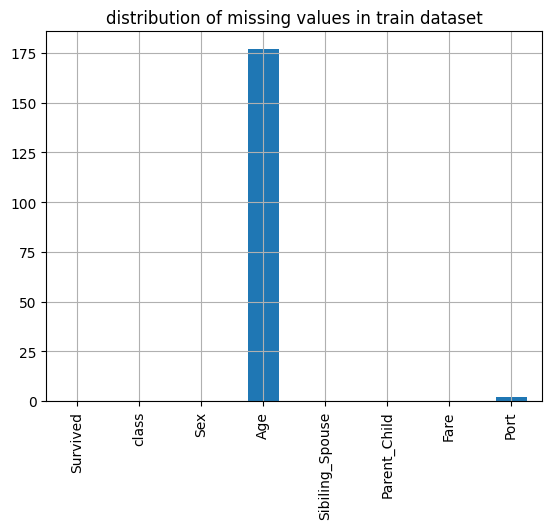

In [65]:
df_train.isna().sum().plot(kind='bar')
plt.title('distribution of missing values in train dataset')
plt.grid()
plt.show()

In [70]:
df_train.describe()

,Survived,class,Age,Sibiling_Spouse,Parent_Child,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[Text(0, 0, 'Southampton'), Text(1, 0, 'Cherbourg'), Text(2, 0, 'Queenstown')]

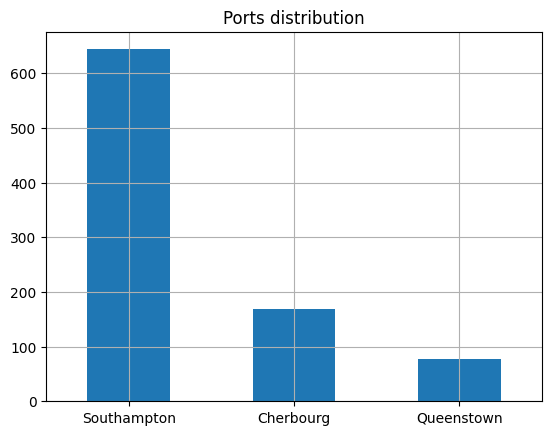

In [77]:
PortHistGraph= df_train['Port'].value_counts().plot(kind='bar')
plt.title('Ports distribution')
plt.grid()
PortHistGraph.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'], rotation = 0)

>most of the passenger get on board from southampton

>drawing histograms for other numeric columns

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'class'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sibiling_Spouse'}>],
       [<Axes: title={'center': 'Parent_Child'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

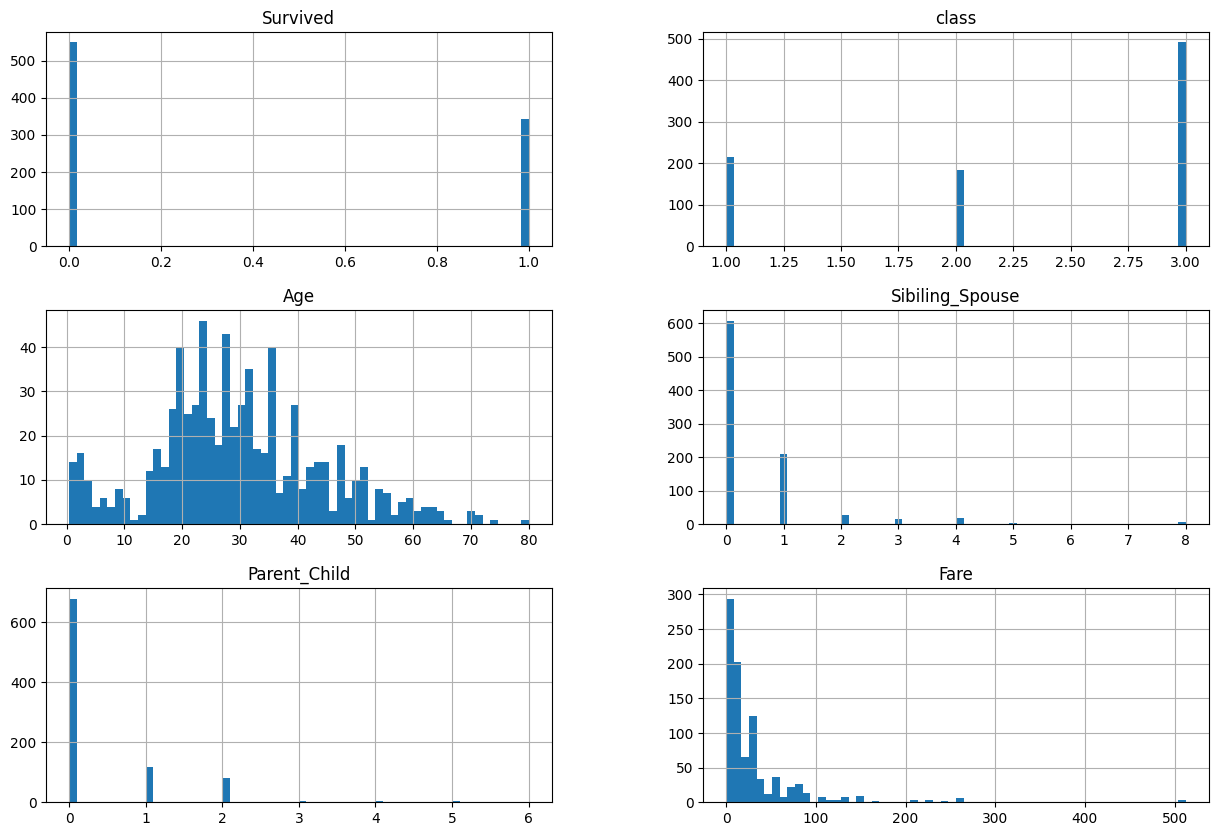

In [79]:
df_train.hist(bins = 60 , figsize=(15,10)) 